# Release Month Analysis

## When is the best month to release a movie?

Here we will look at the success of movies as related to when in the year they were released.

We are grouping the data by release month, as movies can have multiple release dates. Some data points may use premier data, and some may use the date the movie opens to the public. Some movies may release at different days in different parts of the world. To mitigate these possible mistakes in the data, we have chosen to examine the relationship between a movie's success and its release month.

There are many different measures that could define success of a movie, but in this case we will look primarily at worldwide gross revenue. A movie's release date can be chosen completely independently from its budget, so revenue is a better metric than profit or return on investment in this case.

### Accessing and Exploring the Data

Importing the usual suspects to use in this endeavor. Pandas to handle the large dataset, matplotlib and seaborn to create visualizations.

A quick look at the data reveals the columns and their types, as well as the general range of values we can expect from each.

We have 4161 movies in this dataset, ranging from 1915 releases to 2019.

The gross, profit, and ROI maxes are all two or three orders of magnitude above their means. This indicates the presence of far away outliers in our dataset, which will need to be factored in to our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 37 columns):
Unnamed: 0                4161 non-null int64
title                     4161 non-null object
original_title            4161 non-null object
year                      4161 non-null int64
month                     4161 non-null int64
day                       4161 non-null int64
release_date              4161 non-null object
production_budget         4161 non-null int64
domestic_gross            4161 non-null int64
worldwide_gross           4161 non-null int64
worldwide_profit(loss)    4161 non-null int64
roi                       4161 non-null float64
popularity                4161 non-null float64
vote_count                4161 non-null int64
vote_average              4161 non-null float64
original_language         4161 non-null object
genre_ids                 4161 non-null object
action                    4161 non-null bool
adventure                 4161 non-null bool
animation 

In [4]:
df.head()

,Unnamed: 0,title,original_title,year,month,day,release_date,production_budget,domestic_gross,worldwide_gross,...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,overview
0,0,Avatar,Avatar,2009,12,10,2009-12-10,425000000,760507625,2776345279,...,False,False,False,False,True,False,False,False,False,"In the 22nd century, a paraplegic Marine is di..."
1,1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,5,14,2011-05-14,410600000,241063875,1045663875,...,False,False,False,False,False,False,False,False,False,Captain Jack Sparrow crosses paths with a woma...
2,2,Dark Phoenix,Dark Phoenix,2019,6,5,2019-06-05,350000000,42762350,149762350,...,False,False,False,False,True,False,False,False,False,The X-Men face their most formidable and power...
3,3,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,4,22,2015-04-22,330600000,459005868,1403013963,...,False,False,False,False,True,False,False,False,False,When Tony Stark tries to jumpstart a dormant p...
4,4,Avengers: Infinity War,Avengers: Infinity War,2018,4,25,2018-04-25,300000000,678815482,2048134200,...,False,False,False,False,True,False,False,False,False,As the Avengers and their allies have continue...


In [5]:
df.describe()

,Unnamed: 0,year,month,day,production_budget,domestic_gross,worldwide_gross,worldwide_profit(loss),roi,popularity,vote_count,vote_average
count,4161.000000,4161.000000,4161.000000,4161.00000,4.161000e+03,4.161000e+03,4.161000e+03,4.161000e+03,4161.000000,4161.000000,4161.000000,4161.000000
mean,2107.661620,2002.932949,6.755107,15.53641,3.721401e+07,5.103652e+07,1.094411e+08,7.222709e+07,3.896101,18.540035,1910.231915,6.356789
std,1231.533645,13.066677,3.388593,8.55512,4.415907e+07,7.082456e+07,1.860755e+08,1.564184e+08,17.914282,16.552343,2938.558336,0.905343
min,0.000000,1915.000000,1.000000,1.00000,6.000000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,-0.999974,0.600000,0.000000,0.000000
25%,1044.000000,1999.000000,4.000000,8.00000,9.000000e+06,7.836393e+06,1.142709e+07,-1.118662e+06,-0.141982,9.738000,226.000000,5.900000
50%,2091.000000,2005.000000,7.000000,16.00000,2.200000e+07,2.769525e+07,4.248816e+07,1.800000e+07,1.064674,13.927000,824.000000,6.400000
75%,3154.000000,2012.000000,10.000000,23.00000,5.000000e+07,6.382657e+07,1.226038e+08,7.801734e+07,3.056154,21.214000,2273.000000,7.000000
max,4365.000000,2019.000000,12.000000,31.00000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,430.517853,250.684000,27379.000000,10.000000


In [6]:
df['roi'] = df['roi'].map(lambda x: 100*x) #turn roi into a percantage (of movie budget)
# todo: move to data cleaning notebook

### Creating Visualizations

Using Seaborn and Matplotlib to create visualizations of the datat to draw conclusions from. The months are stored as numbers, so the labels are changed to add in the names of the month names. The figures are then saved into a visualizations folder within the project folder.

The plot configuration settings that are often used are declared as variables beforehand, so they only need to be updated in one place.

In [7]:
palette = 'YlGnBu'
context = 'poster'
size = (15, 7.5)
xlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
figpath = 'Visualizations/Release Month Analysis/'

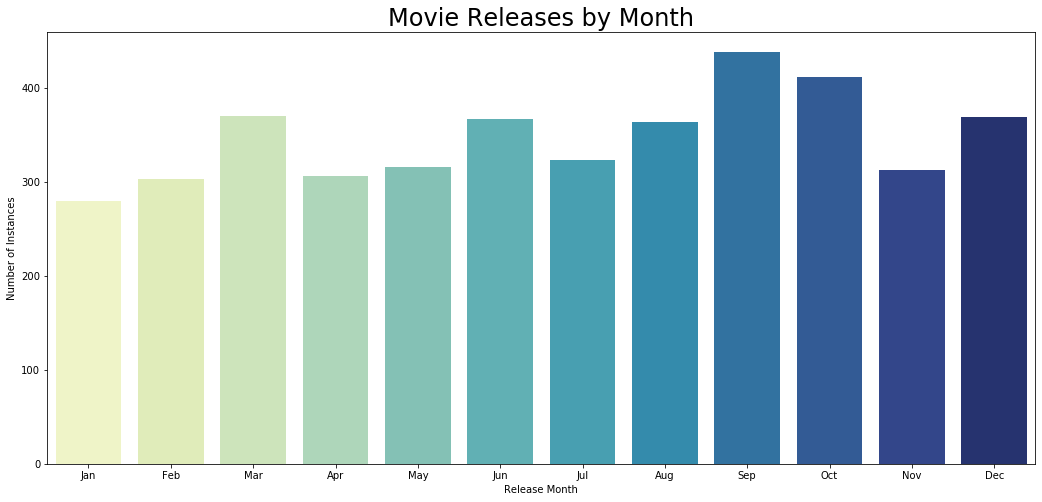

In [8]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size)
month_plot = sns.countplot(df['month'], palette=palette, ax=ax)
month_plot.set(title='Movie Releases by Month', xlabel='Release Month', ylabel='Number of Instances')
ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig(f'{figpath}Movie Releases by Month.png')
plt.show()

We need to group the dataframe by month in order to gather values for the rest of the visualizations. The median will be used to account for the really far outliers for some of these values.

In [9]:
grouped_df = df.groupby('month').median()
grouped_df

,Unnamed: 0,year,day,production_budget,domestic_gross,worldwide_gross,worldwide_profit(loss),roi,popularity,vote_count,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
month,,,,,,,,,,,,,,,,,,,,,
1,2444.0,2007.0,17.0,17500000.0,19710547.0,31176237.0,9485085.5,93.691511,13.3980,472.5,...,False,False,False,False,False,False,False,False,False,False
2,2088.0,2006.0,13.0,22000000.0,30063805.0,45707924.0,18745772.0,107.574875,13.5490,774.0,...,False,False,False,False,False,False,False,False,False,False
3,2130.5,2006.0,15.0,20500000.0,28918193.5,45378587.0,18447883.0,95.131881,14.4345,768.5,...,False,False,False,False,False,False,False,False,False,False
4,2177.5,2006.0,15.0,20000000.0,21827566.0,31313971.0,8644299.5,67.843180,12.2510,580.0,...,False,False,False,False,False,False,False,False,False,False
5,2170.5,2005.0,16.0,20000000.0,32159845.5,45614501.5,23899013.0,145.944250,14.5140,963.0,...,False,False,False,False,False,False,False,False,False,False
6,1688.0,2005.0,16.0,30000000.0,45785720.0,74433837.0,33762229.0,171.297307,15.7140,1207.0,...,False,False,False,False,False,False,False,False,False,False
7,1830.0,2004.0,17.0,27000000.0,40202379.0,72295262.0,35129909.0,142.761700,15.8600,1050.0,...,False,False,False,False,False,False,False,False,False,False
8,2179.0,2005.0,15.0,20000000.0,22845938.5,33400939.5,11683195.0,75.659543,12.8300,588.5,...,False,False,False,False,False,False,False,False,False,False
9,2249.5,2006.0,15.0,20000000.0,17379529.5,27800098.5,7666470.0,57.192290,12.5825,641.0,...,False,False,False,False,False,False,False,False,False,False


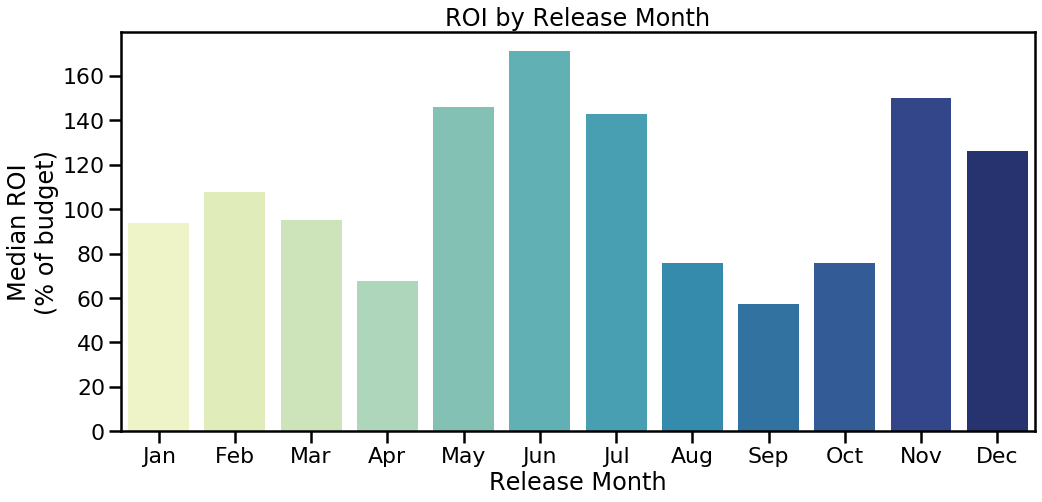

In [10]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size)
roi_plot = sns.barplot(x=grouped_df.index, y='roi', data=grouped_df, palette=palette, ax=ax)
roi_plot.set(title='ROI by Release Month', xlabel='Release Month', ylabel='Median ROI\n(% of budget)')
ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig(f'{figpath}ROI by Release Month.png')
plt.show()

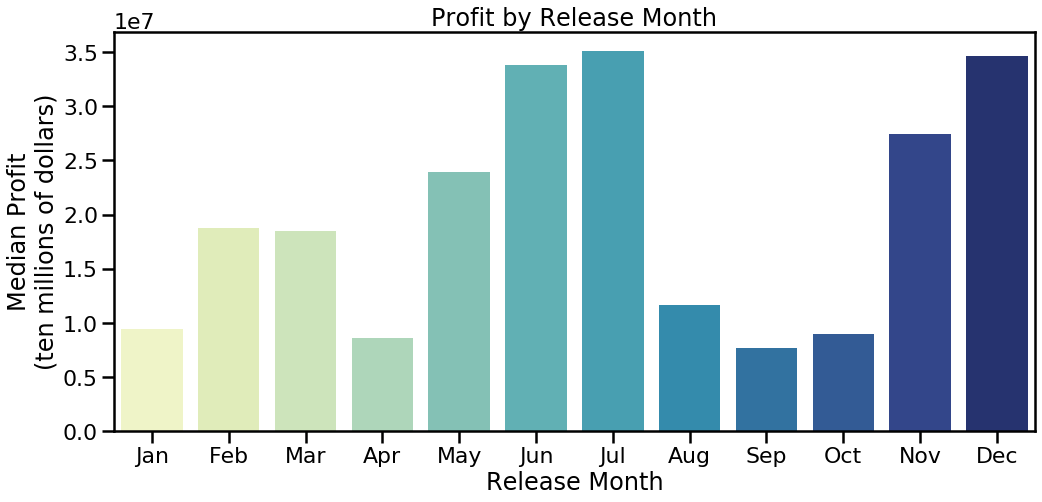

In [11]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size)
profit_plot = sns.barplot(x=grouped_df.index, y='worldwide_profit(loss)', data=grouped_df, palette=palette, ax=ax)
profit_plot.set(title='Profit by Release Month', xlabel='Release Month', ylabel='Median Profit\n(ten millions of dollars)')
ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig(f'{figpath}Profit by Release Month.png')
plt.show()

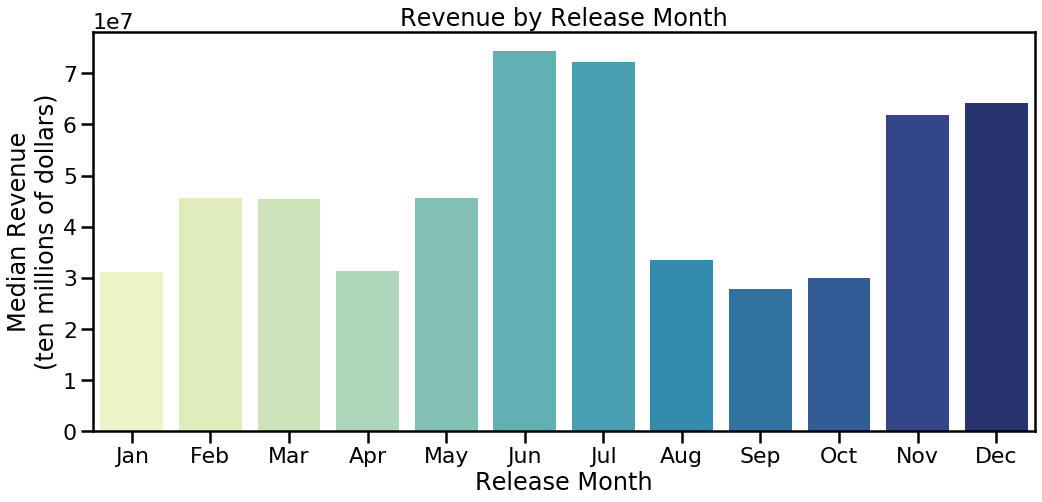

In [12]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size)
revenue_plot = sns.barplot(x=grouped_df.index, y='worldwide_gross', data=grouped_df, palette=palette, ax=ax)
revenue_plot.set(title='Revenue by Release Month', xlabel='Release Month', ylabel='Median Revenue\n(ten millions of dollars)')
ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig(f'{figpath}Revenue by Release Month.png')
plt.show()

We mentioned that revenue seemed the best measure of success in this instance, but we displayed data for our other metrics anyways, just to see if there was any interesting relationship.

As mentioned, this data mitigates the affect of outliers. But what if we want to look only at outliers? After all, a movie studio would surely want to create a movie that vastly overperforms compared to other movies. In order to find out, we create a subset of the dataframe that only contains the high outliers, and visualize it.

We will define an outlier as those above this value:

$Q3 + (1.5 * (Q3 - Q1))$

where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).

In [13]:
def get_high_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>(q3+(1.5*iqr)))]

In [14]:
grouped_outliers_df = get_high_outliers(df, 'worldwide_gross').groupby('month').median()
grouped_outliers_df

,Unnamed: 0,year,day,production_budget,domestic_gross,worldwide_gross,worldwide_profit(loss),roi,popularity,vote_count,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
month,,,,,,,,,,,,,,,,,,,,,
1,341.0,2016.5,18.0,107000000.0,107485432.5,387163327.5,288191989.0,302.621231,56.514,3896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,749.0,2015.0,11.0,60000000.0,177784257.0,381398492.0,369890034.0,579.619744,35.257,5764.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,219.5,2013.5,20.0,130000000.0,177901889.0,476938217.0,380975410.5,322.365767,43.164,5577.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,93.0,2012.0,16.0,172500000.0,206442629.0,603163968.0,425163968.0,342.910185,51.163,7798.5,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
5,212.0,2008.0,19.0,130000000.0,179800601.0,456258539.0,341799634.0,329.246559,34.916,6192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,305.0,2009.0,19.0,105000000.0,206040085.0,527079962.0,385893340.0,386.085024,34.269,6038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,273.5,2008.0,15.0,112500000.0,180106951.5,445283036.0,348861009.5,297.632370,30.842,6956.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,378.0,2009.0,4.0,93000000.0,183875760.0,408269295.0,314043396.0,326.319935,30.899,4952.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,863.0,2012.0,20.0,57500000.0,148313048.0,371917043.0,314319861.0,635.886728,44.651,7082.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


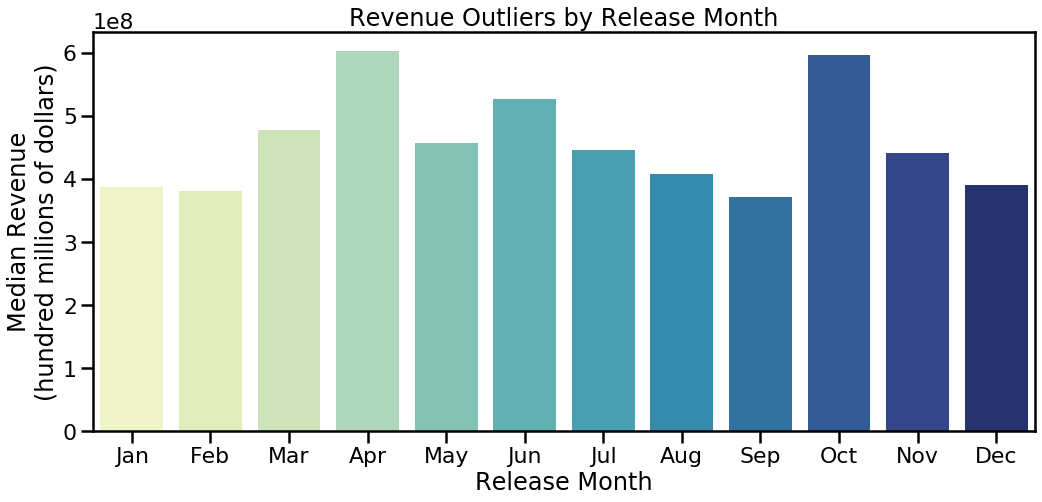

In [15]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size)
roi_plot = sns.barplot(x=grouped_outliers_df.index, y='worldwide_gross', data=grouped_outliers_df, palette=palette, ax=ax)
roi_plot.set(title='Revenue Outliers by Release Month', xlabel='Release Month', ylabel='Median Revenue\n(hundred millions of dollars)')
ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig(f'{figpath}Revenue Outliers by Release Month.png')
plt.show()

As a final thought, what about a movies rating? If the revenue a movie generates changes with the month, a change in movie quality (or percieved quality) could go along with it, or in fact be the cause.

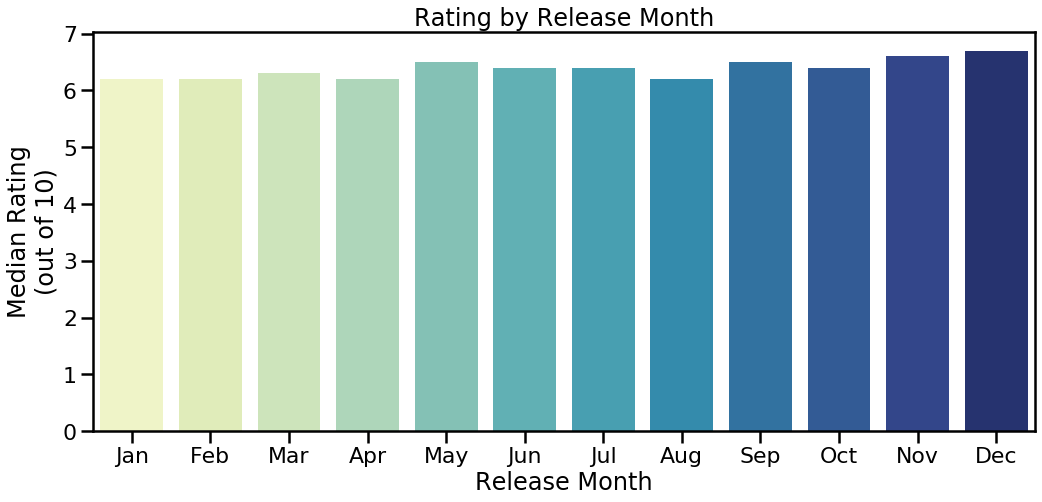

In [16]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size)
vote_averages_plot = sns.barplot(x=grouped_df.index, y='vote_average', data=grouped_df, palette=palette, ax=ax)
vote_averages_plot.set(title='Rating by Release Month', xlabel='Release Month', ylabel='Median Rating\n(out of 10)')
ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig(f'{figpath}Median Rating by Release Month.png')
plt.show()

### Conclusions

- June, July, November, and December releases see much more movie revenue than other months
- These months line up with common holidays for students

- Quantity of releases does not line up with revenue by month
- Studios may be trying to avoid most movies releasing near summer and winter blockbuster movies

- Overperforming movies do not match the same pattern as most movie releases
- Breakout hit movies may be harder to predict

- A movie's rating has nothing to do with its release month

### Restrictions and Future Considerations

- Many of these movies are from a long time ago, and may not be representative of current trends
- Do films have similar trends in countries that have different school breaks?
- Are certain genres of films more popular in certain months?